# Experiment

In [ ]:
import  mlflow

experiment_id = mlflow.create_experiment(name="second_experiment_for_test", tags={"version": "v1"})
print(f"Experiment id: {experiment_id}")

In [ ]:
experiment = mlflow.set_experiment(experiment_name="second_experiment_for_test")

In [ ]:
with mlflow.start_run() as run:
    print(f"Active run_id: {run.info.run_id}") 

In [ ]:
experiment = mlflow.get_experiment_by_name(name="second_experiment_for_test")
if experiment is None:
    print("experiment does not exist!")
print(experiment.name)
print(experiment.experiment_id)

In [ ]:
experiment.to_proto()

In [ ]:
experiment.to_proto()

In [ ]:
mlflow.set_experiment_tag(key="Owner", value="Pourya")

In [ ]:
experiment = mlflow.set_experiment(experiment_name="second_experiment_for_test")
experiment.to_proto()

In [ ]:
client = mlflow.MlflowClient()
client.set_experiment_tag(experiment_id=experiment.experiment_id, key="client_tag", value="new-tag-by-client")
print(experiment.to_proto())

In [ ]:
mlflow.set_experiment_tag(key="mlflow.note.content", value="this is a test description...")

# Runs

In [ ]:
import mlflow

run = mlflow.start_run()
print(type(run).__name__)

In [ ]:
run.info.to_proto()

In [ ]:
run.data.to_dictionary()

In [ ]:
# add some logs params and metrics
mlflow.log_param("param1", 15)
mlflow.log_param("param2", 25)
mlflow.log_param("param4", 35)

mlflow.log_metric("metric1", 0.15)
mlflow.log_metric("metric2", 0.25)
mlflow.log_metric("metric3", 0.35)


In [ ]:
run = mlflow.get_run(run_id=run.info.run_id)

In [ ]:
run.data.to_dictionary()

In [ ]:
mlflow.end_run(run)

In [ ]:
run.info.to_proto()

In [ ]:
with mlflow.start_run() as run:
    print("WITHIN RUN CONTEXT")
    print("Run status: ", run.info.status)
    #logs params and metrics ...
    mlflow.log_param("param1", 15)
    mlflow.log_param("param2", 25)
    mlflow.log_param("param4", 35)

    mlflow.log_metric("metric1", 0.15)
    mlflow.log_metric("metric2", 0.25)
    mlflow.log_metric("metric3", 0.35)

print("OUTSIDE TUN CONTEXT")
run = mlflow.get_run(run_id=run.info.run_id)

print("Run status: ", run.info.status)
print(run.data.to_dictionary())

In [13]:
import mlflow

client = mlflow.MlflowClient()
# create a run in the default experiment
run= client.create_run(experiment_id="0")
print(type(run).__name__)

Run


In [6]:
run.info.to_proto()

run_uuid: "42d5ced3ec9b49ce9690283c5962a7c1"
experiment_id: "0"
run_name: "persistent-hog-712"
user_id: "unknown"
status: RUNNING
start_time: 1760684155154
artifact_uri: "file:///home/paminidigehsara/Desktop/MLflow/mlruns/0/42d5ced3ec9b49ce9690283c5962a7c1/artifacts"
lifecycle_stage: "active"
run_id: "42d5ced3ec9b49ce9690283c5962a7c1"

In [7]:
mlflow.log_metric("ran_met", 10)

In [8]:
mlflow.end_run()

In [10]:
client.set_terminated(run_id="42d5ced3ec9b49ce9690283c5962a7c1")

In [11]:
run = client.create_run(experiment_id="0")

with mlflow.start_run(run_id=run.info.run_id) as run:
    print("Within RUN CONTEXT")
    print("RUN NAME: ", run.info.run_name)
    print("RUN status: ",run.info.status)
    mlflow.log_param("p1", 1)
    mlflow.log_metric("m1", 2)
run = client.get_run(run.info.run_id)
print("OUTSIDE CONTEXT")
print("RUN NAME: ", run.info.run_name)
print("RUN status: ",run.info.status)
print("RUN DATA", run.data.to_dictionary())

Within RUN CONTEXT
RUN NAME:  clumsy-flea-730
RUN status:  RUNNING
OUTSIDE CONTEXT
RUN NAME:  clumsy-flea-730
RUN status:  FINISHED
RUN DATA {'metrics': {'m1': 2.0}, 'params': {'p1': '1'}, 'tags': {'mlflow.runName': 'clumsy-flea-730'}}


In [26]:
mlflow.start_run()
run = mlflow.active_run()
print(run.info.lifecycle_stage)
print(run.info.status)
print(run.info.run_name)
mlflow.end_run()
print(mlflow.active_run())

active
RUNNING
flawless-moose-762
None


In [27]:
print(mlflow.last_active_run())

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'flawless-moose-762',
 'mlflow.source.name': '/home/paminidigehsara/Desktop/MLflow/.venv_mlflow/lib/python3.13/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'paminidigehsara'}>, info=<RunInfo: artifact_uri='file:///home/paminidigehsara/Desktop/MLflow/mlruns/0/f10191e5d28b42e58f9d8d5372ff20f2/artifacts', end_time=1760686457251, experiment_id='0', lifecycle_stage='active', run_id='f10191e5d28b42e58f9d8d5372ff20f2', run_name='flawless-moose-762', start_time=1760686457245, status='FINISHED', user_id='paminidigehsara'>, inputs=<RunInputs: dataset_inputs=[], model_inputs=[]>, outputs=<RunOutputs: model_outputs=[]>>


In [70]:
client = mlflow.MlflowClient()
run = client.create_run(experiment_id="0")

In [71]:
run.info.to_proto()

run_uuid: "4f021cedb947493cb577af244970e191"
experiment_id: "0"
run_name: "indecisive-slug-284"
user_id: "unknown"
status: RUNNING
start_time: 1760688061468
artifact_uri: "file:///home/paminidigehsara/Desktop/MLflow/mlruns/0/4f021cedb947493cb577af244970e191/artifacts"
lifecycle_stage: "active"
run_id: "4f021cedb947493cb577af244970e191"

### Set Tags

In [ ]:
# Set tags
client.set_tag(run_id=run.info.run_id, key="tag1",value="tag1-value")
client.set_tag(run_id=run.info.run_id, key="tag2",value="tag2-value")

run = mlflow.last_active_run()
run.data.tags

{'mlflow.user': 'paminidigehsara',
 'mlflow.source.name': '/home/paminidigehsara/Desktop/MLflow/.venv_mlflow/lib/python3.13/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.runName': 'flawless-moose-762',
 'tag1': 'tag1-value',
 'tag2': 'tag2-value'}

In [62]:
run.data.to_dictionary()

{'metrics': {},
 'params': {},
 'tags': {'mlflow.user': 'paminidigehsara',
  'mlflow.source.name': '/home/paminidigehsara/Desktop/MLflow/.venv_mlflow/lib/python3.13/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'flawless-moose-762'}}

In [68]:
client.set_terminated(run_id="a0281e1080644d099321ff75c9f801b5")

In [69]:
mlflow.last_active_run()

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'flawless-moose-762',
 'mlflow.source.name': '/home/paminidigehsara/Desktop/MLflow/.venv_mlflow/lib/python3.13/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'paminidigehsara',
 'tag1': 'tag1-value',
 'tag2': 'tag2-value'}>, info=<RunInfo: artifact_uri='file:///home/paminidigehsara/Desktop/MLflow/mlruns/0/f10191e5d28b42e58f9d8d5372ff20f2/artifacts', end_time=1760686457251, experiment_id='0', lifecycle_stage='active', run_id='f10191e5d28b42e58f9d8d5372ff20f2', run_name='flawless-moose-762', start_time=1760686457245, status='FINISHED', user_id='paminidigehsara'>, inputs=<RunInputs: dataset_inputs=[], model_inputs=[]>, outputs=<RunOutputs: model_outputs=[]>>

In [ ]:
client.set_tag(run_id=run.info.run_id, key="mlflow.note.content",value="DESCRIPTION HERE")


### Nested Runs

In [75]:
# nested RUN
#there is an old version to implement like nested loops but a modern way is:
with mlflow.start_run(run_name="parent") as parent_run:
    print("Parent run_id: ", parent_run.info.run_id)
    mlflow.log_param("parent_param", 1)
with mlflow.start_run(run_name="child", parent_run_id=parent_run.info.run_id) as child_run:
    print("Child run_id: ", child_run.info.run_id)
    mlflow.log_metric("metric_child", 2)
with mlflow.start_run(run_name="grandchild", parent_run_id=child_run.info.run_id) as grandchild_run:
    print("Grandchild run_id", grandchild_run.info.run_id)
    mlflow.log_param("grand_child_param", 3)

Parent run_id:  471c900693104f9cb004cbf44f4e2e65
Child run_id:  4d4ba01a6f6f49a49c10eb8ce28a2abb
Grandchild run_id eff3528ef7f9493d97107e23fc0b84cb


In [77]:
# delete a run
mlflow.delete_run(run_id="45e594384fea4c4dbccd9df352b773ec")

In [84]:
client = MlflowClient()

run = client.create_run(experiment_id="0")
client.delete_run(run.info.run_id)

lifecycle_stage = client.get_run(run.info.run_id).info.lifecycle_stage
print(f"run_id: {run.info.run_id}; lifecycle_stage: {lifecycle_stage}")

run_id: a3b20c5848fb46ba8fe2f45f4668e7ea; lifecycle_stage: deleted


### Log metric

In [97]:
import mlflow

with mlflow.start_run(run_name="logging metric") as run:
    mlflow.log_metric("m1", 2.0)

run = mlflow.get_run(run.info.run_id)
print(f"run_id: {run.info.run_id}.")
run.data.to_dictionary()

run_id: a49d2c945f3540a09e88cbe5732c0d45.


{'metrics': {'m1': 2.0},
 'params': {},
 'tags': {'mlflow.user': 'paminidigehsara',
  'mlflow.source.name': '/home/paminidigehsara/Desktop/MLflow/.venv_mlflow/lib/python3.13/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'logging metric'}}

In [100]:
from pathlib import Path
path = Path("artifact_file.txt")

with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifact(path, artifact_path="my artifacts")


### MLflow Models

In [109]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

with mlflow.start_run(run_name="logging-random-forest") as run:
    mlflow.sklearn.log_model(sk_model=rfc, artifact_path="random-forest-model")

2025/10/17 13:22:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 13:22:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris =load_iris(as_frame=True)
x = iris.data
y = iris.target
#create input_example
input_example = x.iloc[0:10]
rfc = RandomForestClassifier(n_estimators=10)

with mlflow.start_run(run_name="logging-random-forest") as run:
    mlflow.sklearn.log_model(sk_model=rfc,
                            artifact_path="random-forest-model",
                            input_example=input_example)

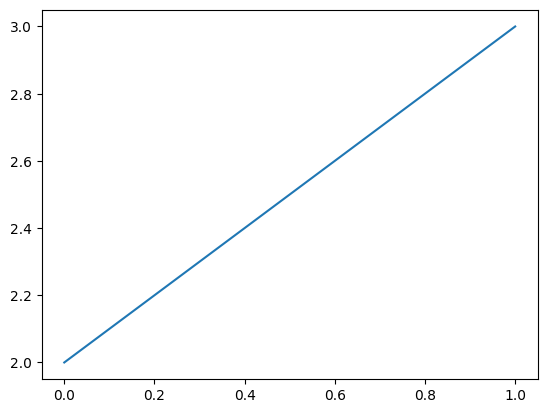

In [116]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots()
ax.plot([0,1], [2,3])

with mlflow.start_run(run_name="logging_figures")as run:
    mlflow.log_figure(fig, artifact_file="figures/my_fig.png")

In [ ]:
# log model with schema
from mlflow.models import ModelSignature
from mlflow.types.schema import Schema, ColSpec
from sklearn.datasets import load_iris

iris =load_iris(as_frame=True)

#schema for the feature columns(should create a list of ColSpec objects)
col_specifications=[
    ColSpec(type="double", name=feature_name, required= True) for feature_name in iris.feature_names
]
#Schema for model input
model_input = Schema(inputs = col_specifications)
model_output =Schema(inputs=[ColSpec(type="integer", name="species", required=True)])

#create the model signature
model_signature = ModelSignature(inputs = model_input,
                                 outputs = model_output)

#Now logging the model using schema
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(iris.data, iris.target)

with mlflow.start_run(run_name="logging-random-forest") as run:
    mlflow.sklearn.log_model(sk_model=rfc, artifact_path="random-forest-model", signature=model_signature)

2025/10/17 14:04:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2ba41065bbb34c22b0622356cfc6cdf5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/10/17 14:04:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/17 14:04:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/17 14:04:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [ ]:
# signature enforecemnt
